# Hypothesis Testing with Insurance Data
Cameron Peace

### Task

xFor this assignment, we will be working with the [US Health Insurance Dataset](https://docs.google.com/spreadsheets/d/e/2PACX-1vQBN8DPW2rdiRrY34eEM53HAzakNGSRrw4ogI-j8HyCUrbqTB_z4CeIn2IvjLF-w_6sOe5pIlypJGAA/pub?output=csv) from [Kaggle](https://www.kaggle.com/teertha/ushealthinsurancedataset).

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?

For each question, make sure to:

* [x] State your Null Hypothesis and Alternative Hypothesis
* [x] Select the correct test according to the data type and number of samples
* [x] Test the assumptions of your selected test.
* [x] Execute the selected test, or the alternative test (if you do not meet the assumptions)
* [x] Interpret your p-value and reject or fail to reject your null hypothesis 
* [x] Show a supporting visualization that helps display the result

### Data Background

From Kaggle:
>This dataset contains 1338 rows of insured data, where the Insurance charges are given against the following attributes of the insured: Age, Sex, BMI, Number of Children, Smoker and Region. There are no missing or undefined values in the dataset.

There is no information regarding data collection, provenance, time frame, etc.  The data are assumed to be fictitious.

### Data Dictionary

* **Age**  - Age of primary beneficiary

* **sex** - Insurance contractor gender, female / male

* **bmi** - Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

* **children** - Number of children covered by health insurance / Number of dependents

* **smoker** - Smoker / Non - smoker

* **region** - The beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

* **charges** - Individual medical costs billed by health insurance.

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Loading, Viewing Data

In [2]:
# loading
df = pd.read_csv('insurance.csv')

# making a copy in case comparison is needed
df_original = df.copy()

In [3]:
# initial viewing
df.sample(5)

,age,sex,bmi,children,smoker,region,charges
166,20,female,37.000,5,no,southwest,4830.63000
228,41,female,31.635,1,no,northeast,7358.17565
1215,18,male,39.140,0,no,northeast,12890.05765
817,23,male,37.100,3,no,southwest,3597.59600
1333,50,male,30.970,3,no,northwest,10600.54830


In [4]:
display(df.info(), df.describe(include='all'), df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


None

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
This dataset looks fairly clean at first glance.  We have outliers in 'charges' and 'children'.  It appears our sexes are balanced, our smoker/non-smoker values are not (more non-smokers).  This dataset also seems to be skewed towards overweight/obese patients.
</i></font>

### Cleaning, checking data

In [5]:
# checking from duplicates
df.duplicated().sum()

1

In [6]:
# checking shape for confirmation
display(df.shape)

# removing duplicate entry
df = df.drop_duplicates().copy()

# confirming
display(df.shape)

(1338, 7)

(1337, 7)

In [7]:
# checking for NaNs
df.isna().sum().sum()

0

In [8]:
# checking for incorrect values 
for i in df.columns:
    if df[i].dtype == 'object' or df[i].nunique() < 15:
        print(i + ':\n', df[i].unique(), '\n****')

sex:
 ['female' 'male'] 
****
children:
 [0 1 3 2 5 4] 
****
smoker:
 ['yes' 'no'] 
****
region:
 ['southwest' 'southeast' 'northwest' 'northeast'] 
****


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Looking good here, we dropped 1 duplicate value, but otherwise our dataset looks clean.
</i></font>

## **Question 1: Do smokers have higher insurance charges than non-smokers?**

### Hypotheses Statements and Tests:

#### Null Hypothesis: 
***There is no significant difference in insurance charges between smokers and non-smokers***

#### Alternative Hypothesis: 
***There is a significant difference in insurance charges between smokers and non-smokers***

#### Alpha = 0.05

#### Which Test?
We'll use an independent t-test because we will be comparing means between two independent groups

#### Test Assumptions:
For an independent t-test to be viable, we will need:
* No significant outliers
* Normality (our sample size makes this requirement unnecessary)
* Equal Variance (our sample sizes are large enough that this will not be necessary).

In [9]:
# creating the two groups
smokers = df[df['smoker'] == 'yes'].copy()
non_smokers = df[df['smoker'] == 'no'].copy()

# creating feature of interest
smokers_charges = smokers['charges']
non_smokers_charges = non_smokers['charges']

In [10]:
# checking
display(df.shape, smokers.shape, smokers_charges.shape, 
                 non_smokers.shape, non_smokers_charges.shape)
display(smokers.sample(5), non_smokers.sample(5))

(1337, 7)

(274, 7)

(274,)

(1063, 7)

(1063,)

,age,sex,bmi,children,smoker,region,charges
288,59,female,36.765,1,yes,northeast,47896.79135
301,53,female,22.610,3,yes,northeast,24873.38490
64,20,female,22.420,0,yes,northwest,14711.74380
84,37,female,34.800,2,yes,southwest,39836.51900
70,27,female,24.750,0,yes,southeast,16577.77950


,age,sex,bmi,children,smoker,region,charges
199,64,female,39.330,0,no,northeast,14901.51670
807,19,female,36.575,0,no,northwest,2136.88225
196,39,female,32.800,0,no,southwest,5649.71500
293,22,female,28.820,0,no,southeast,2156.75180
620,30,male,31.400,1,no,southwest,3659.34600


### **Data Viz Q1** Viewing Distribution of charges

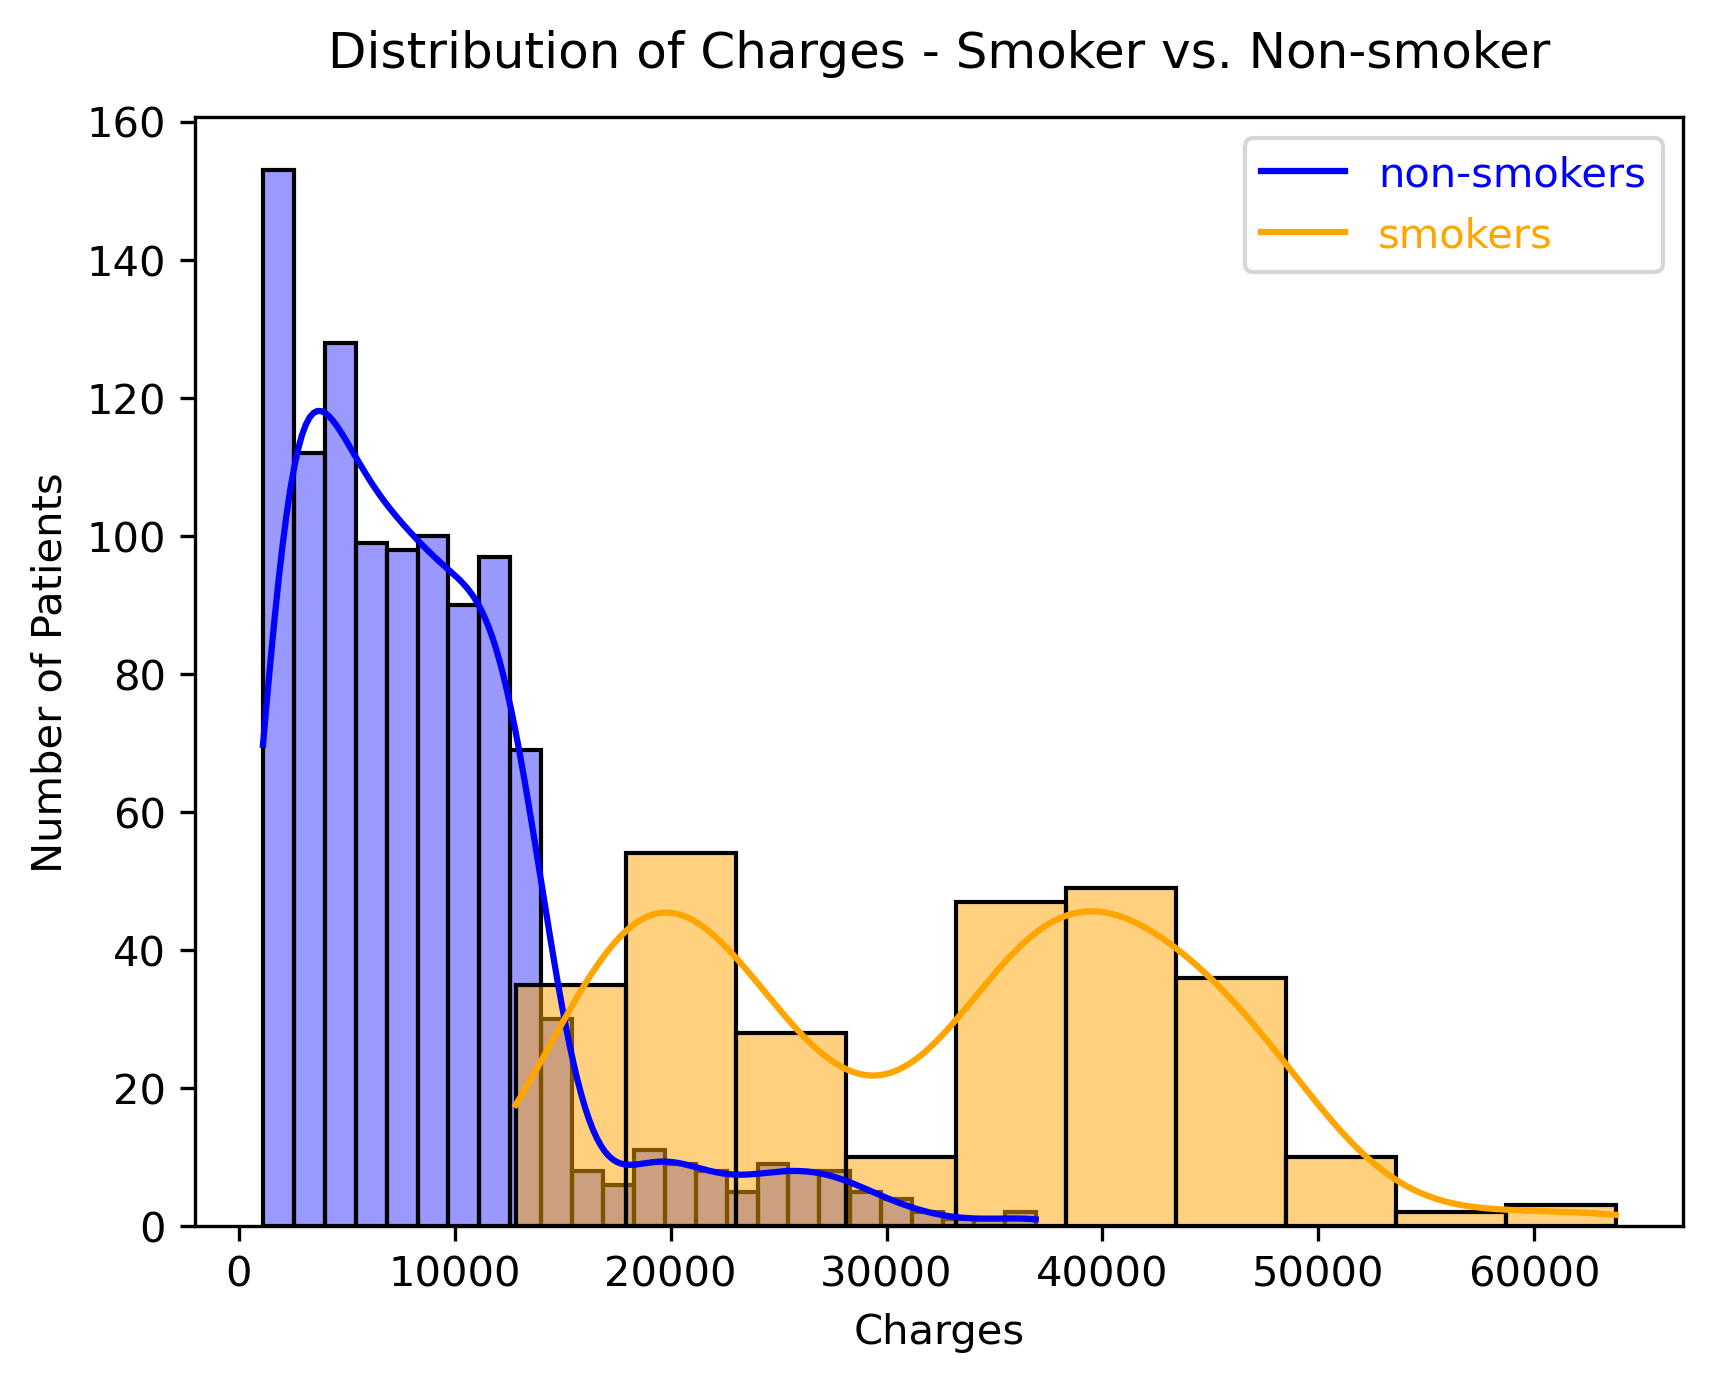

In [11]:
# plotting the distribution of charges between smokers and non-smokers
fig, ax = plt.subplots(dpi=300)
sns.histplot(non_smokers_charges, ax=ax, color='blue', 
             alpha=.4, kde=True)
sns.histplot(smokers_charges, ax=ax, label='smokers', color='orange', 
             kde=True)
plt.legend(['non-smokers', 'smokers'], labelcolor=['blue', 'orange'])
plt.title('Distribution of Charges - Smoker vs. Non-smoker', pad=12)
plt.ylabel('Number of Patients')
plt.xlabel('Charges');

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Well, it certainly looks like smokers pay more at first glance, but let's run some more numbers to make sure that is statistically the case.
</i></font>

### Check for and remove outliers

In [12]:
# creating zscores for each group
smokers_zs = stats.zscore(smokers_charges)
non_smokers_zs = stats.zscore(non_smokers_charges)

# checking
display(len(smokers_zs), len(non_smokers_zs))

274

1063

In [13]:
# checking for outliers
print(f'Outliers in smokers: {np.sum(abs(smokers_zs) > 3)}')
print(f'Outliers in non-smokers: {np.sum(abs(non_smokers_zs) > 3)}')

Outliers in smokers: 0
Outliers in non-smokers: 24


In [14]:
# removing outliers in non-smokers
non_smokers['zscore'] = stats.zscore(non_smokers['charges'])
non_smokers = non_smokers[abs(non_smokers['zscore']) < 3].copy()

In [15]:
# confirming
print(f'New number for non_smokers after filtering:  {len(non_smokers)}')
print(f"Outliers in non-smokers:  {np.sum(abs(non_smokers['zscore']) > 3)}")

New number for non_smokers after filtering:  1039
Outliers in non-smokers:  0


In [16]:
# resetting feature of interest after filtering
smokers_charges = smokers['charges'].copy()
non_smokers_charges = non_smokers['charges'].copy()

# confirming
print(smokers_charges.shape, non_smokers_charges.shape)

(274,) (1039,)


### Check for Normality

In [17]:
# checking non-smokers distribution
display(stats.normaltest(non_smokers_charges), 
        stats.normaltest(non_smokers_charges).pvalue > 0.05) 

NormaltestResult(statistic=163.70821423990097, pvalue=2.8262654970074626e-36)

False

In [18]:
# smokers distributon
display(stats.normaltest(smokers_charges), 
        stats.normaltest(smokers_charges).pvalue > 0.05)

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

False

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Both groups are not normally distributed, but because we are working with larger sample sizes, we can proceed with the t-test
</i></font>

### Check for Equal Variance

In [19]:
# performing and displaying Levene's test for equal variances
display(stats.levene(smokers_charges, non_smokers_charges),
        stats.levene(smokers_charges, non_smokers_charges).pvalue > 0.05) 

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

False

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Our variances are not equal so we will use equal_var=False when we run our t-test
</i></font>

### ***T-test Result**

In [20]:
# performing t-test
ttest_result = stats.ttest_ind(smokers_charges, non_smokers_charges, 
                               equal_var=False)

# displaying results
print(ttest_result, '\n\n', 
      f'*** pvalue less than 0.05? - {ttest_result.pvalue < 0.05} ***')

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104) 

 *** pvalue less than 0.05? - True ***


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Our p-value is less than 0.05 so we can reject the null hypothesis that smokers and non-smokers pay the same amount for health insurance.  ***Smokers in this sample are statistically more likely to pay a greater amount for health insurance when compared to non-smokers.***
</i></font>

## Question 2:  Are men more likely to smoke than women?

### Hypotheses Statements and Tests

#### Null Hypothesis: 
***Men and women are equally likely to smoke***

#### Alternative Hypothesis: 
***Men are more likely to smoke than women***

#### Alpha = 0.05

#### Which Test?
We'll use a chi-square test because we are comparing two categories.

#### Test Assumptions (from statology.org)
* Assumption 1: Both variables are categorical.
* Assumption 2: All observations are independent.
* Assumption 3: Cells in the contingency table are mutually exclusive.
* Assumption 4: Expected value of cells should be 5 or greater in at least 80% of cells.

### **Data Viz Q2** Viewing Gender and Smoking

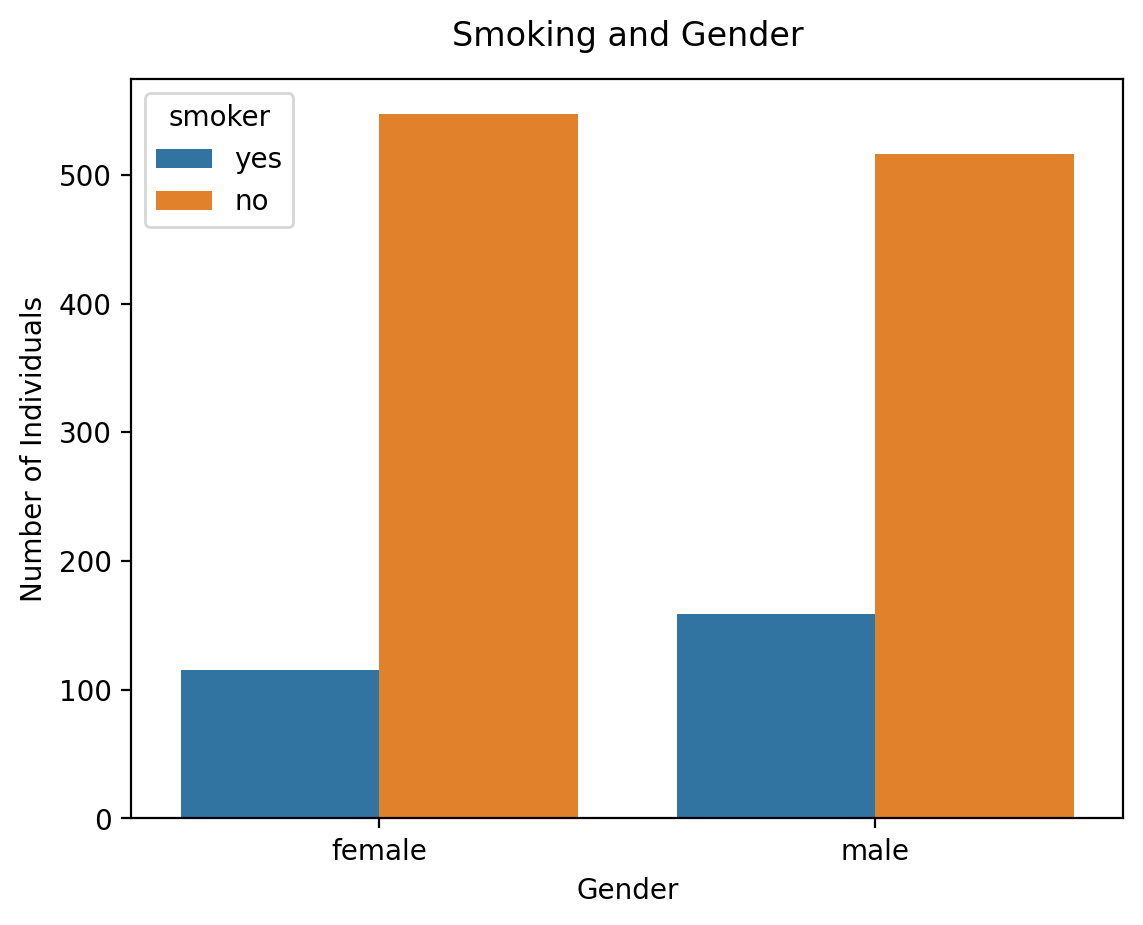

In [21]:
# plotting the number of smokers and non-smokers in each gender
plt.figure(dpi=200)
sns.countplot(data=df, x='sex', hue='smoker')
plt.title('Smoking and Gender', pad=12)
plt.ylabel('Number of Individuals')
plt.xlabel('Gender');

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
At first look it appears that there may be a greater proportion of male smokers, but it's difficult to say whether or not it's large enough to be statistically significant.
</i></font>

### Contingency Table

In [22]:
# building and displaying a contingency table
c_table = pd.crosstab(df['sex'], df['smoker'])
c_table

smoker,no,yes
sex,,
female,547,115
male,516,159


### ***Chi Square Test Results**

In [23]:
# getting and labeling the chi2 statistics
result = stats.chi2_contingency(c_table)

# assigning the results of our chi2 test to variables
chi2, p, deg_free, expected_vals = result

In [24]:
# displaying results
print('Chi Square Results','\n\n',
      f'*** p-value less than 0.05? - {p < 0.05} ***\n',
     f'p-value: {p}\n', f'Chi2: {chi2}\n', f'Degrees of Freedom: {deg_free}\n',
     f'Expected Values: \n{expected_vals}')

Chi Square Results 

 *** p-value less than 0.05? - True ***
 p-value: 0.0062765550120107375
 Chi2: 7.469139330086637
 Degrees of Freedom: 1
 Expected Values: 
[[526.33208676 135.66791324]
 [536.66791324 138.33208676]]


In [25]:
# displaying actual results vs expected results
display(c_table, pd.DataFrame(expected_vals.astype(int)))

smoker,no,yes
sex,,
female,547,115
male,516,159


,0,1
0,526,135
1,536,138


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Our p-value is less than 0.05 so we can reject the null hypothesis and conclude that there is a statistically significant difference in smoking when it comes to gender.  Looking at the difference between the expected and actual values for our contingency table, we can see that there is indeed a higher proportion of males that smoke when compared to females
</i></font>

## Question 3: Do different regions have different charges, on average?

### Hypotheses Statements and Tests

#### Null Hypothesis: 
***There is no significant difference between different regions when considering average charges***

#### Alternative Hypothesis: 
***There is a significant difference between different regions when considering average charges***

#### Alpha = 0.05

#### Which Test?
We'll use ANOVA here because we have more than 2 categories we're comparing

### Test Assumptions
* Normality
* Equal variance
* No significant outliers

### Checking and Removing Outliers

In [26]:
# creating new column with z scores
df['charges_zs'] = stats.zscore(df['charges'])

# confirming
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_zs
0,19,female,27.900,0,yes,southwest,16884.92400,0.297857
1,18,male,33.770,1,no,southeast,1725.55230,-0.954381
2,28,male,33.000,3,no,southeast,4449.46200,-0.729373
3,33,male,22.705,0,no,northwest,21984.47061,0.719104
4,32,male,28.880,0,no,northwest,3866.85520,-0.777499


In [27]:
# checking outliers
display(df[abs(df['charges_zs']) > 3], 
    f"We have {len(df[abs(df['charges_zs']) > 3])} outliers in the dataset")

,age,sex,bmi,children,smoker,region,charges,charges_zs
34,28,male,36.400,1,yes,southwest,51194.55914,3.131998
543,54,female,47.410,0,yes,southeast,63770.42801,4.170826
577,31,female,38.095,1,yes,northeast,58571.07448,3.741334
819,33,female,35.530,0,yes,northwest,55135.40209,3.457531
1146,60,male,32.800,0,yes,southwest,52590.82939,3.247337
1230,52,male,34.485,3,yes,northwest,60021.39897,3.861138
1300,45,male,30.360,0,yes,southeast,62592.87309,4.073554


'We have 7 outliers in the dataset'

In [28]:
# creating new df with outliers removed
df_no_out = df[abs(df['charges_zs'] < 3)].copy()

# confirming
display(df.shape, df_no_out.shape)

(1337, 8)

(1330, 8)

### **Data Viz Q3** Cost Across Regions

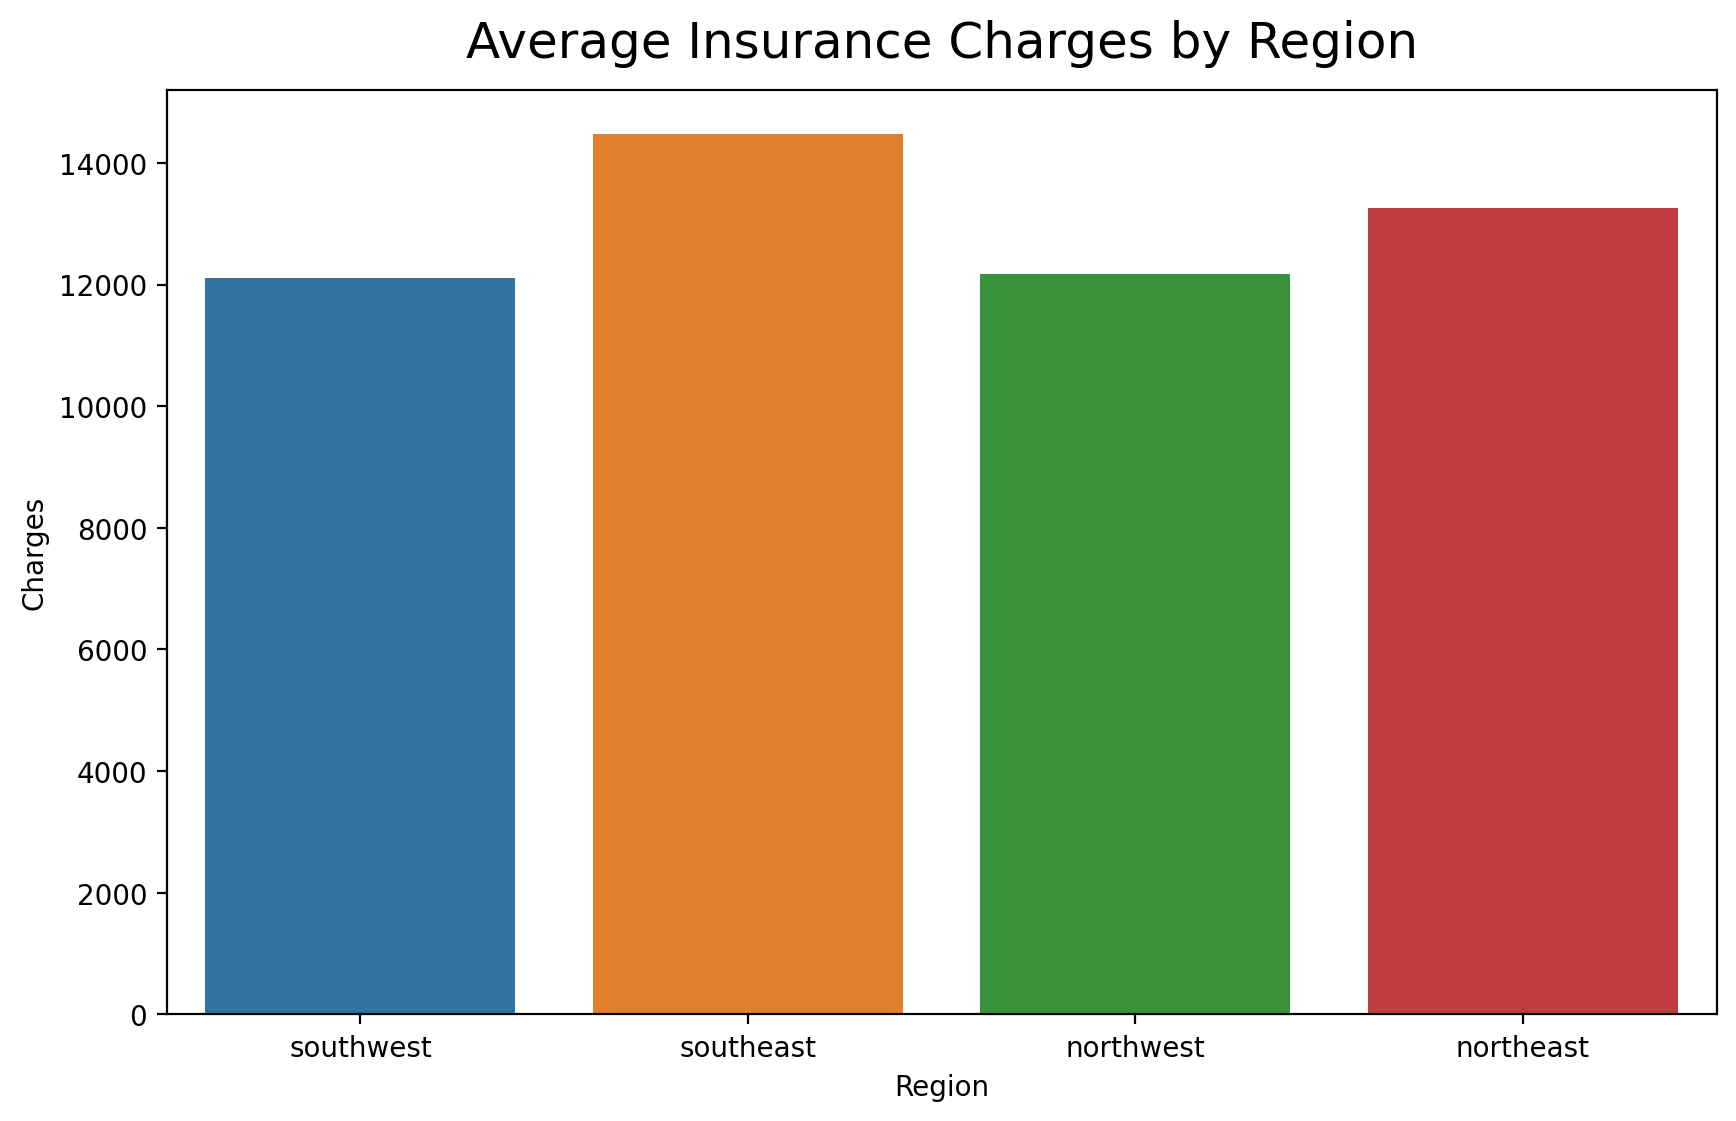

In [29]:
# plotting charges by region
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=df_no_out, y='charges', x='region', errorbar=None)
plt.title('Average Insurance Charges by Region', pad=12, fontsize=18)
plt.xlabel('Region')
plt.ylabel('Charges');

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
There is a noticeable between difference what patients pay in the southeast as opposed to the other regions (maybe due to Florida with older demographics?).  We will see if this difference is statistically significant or not.
</i></font>

### Separating Groups

In [30]:
# creating a dictionary with region names for keys and all charges for values
regions = {}

for i in df_no_out['region'].unique():
    data = df_no_out.loc[df['region'] == i, 'charges'].copy()
    regions[i] = data

In [31]:
# confirming everything adds up
print(regions.keys(), '\n')

all_regions_sum = 0
for i, v in regions.items():
    all_regions_sum += len(v)
    print(i.upper(), len(v))

print(f'sum of all regions: {all_regions_sum}')
print(f'sum of original df: {len(df_no_out)}')

dict_keys(['southwest', 'southeast', 'northwest', 'northeast']) 

SOUTHWEST 323
SOUTHEAST 362
NORTHWEST 322
NORTHEAST 323
sum of all regions: 1330
sum of original df: 1330


### Check for Normality

In [33]:
# adding all test results to a dictionary, turn to DataFrame for viewing
norm_results = {}

for i, data in regions.items():
    stat, p = stats.normaltest(data)
    norm_results[i] = {'n': len(data), 'p': p, 'test stat': stat}

norm_results_df = pd.DataFrame(norm_results).T

In [34]:
# creating a new column to better view test results
norm_results_df['significant?'] = norm_results_df['p'] < 0.05

# viewing df
norm_results_df

,n,p,test stat,significant?
southwest,323.0,1.718876e-22,100.230402,True
southeast,362.0,1.936990e-13,58.544942,True
northwest,322.0,1.131994e-20,91.855443,True
northeast,323.0,6.205365e-18,79.242235,True


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Our groups are not normally distributed, however, our sample sizes are large enough that we can still use an ANOVA test. 
</i></font>

### Checking Variance

In [38]:
# checking our variance
levene_result = stats.levene(*regions.values())

# displaying
display(levene_result, f'p-value less than 0.05? - {levene_result.pvalue < 0.05}')

LeveneResult(statistic=5.889623709684624, pvalue=0.0005423057720966022)

'p-value less than 0.05? - True'

<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
Unfortunately our we have unequal variance, so we will need to use a Kruskal-Wallis test instead of an ANOVA test.
</i></font>

### ***Kruskal-Wallis Test Results**

In [43]:
# performing the test
h_stat, p_value = stats.kruskal(*regions.values())

# displaying results
print(f'H-Statistic: {h_stat}', '\n\n', f'p-value: {p_value}')

H-Statistic: 5.001171607764263 

 p-value: 0.17171137352025162


<mark><u>**Comment:**</u>

<font color='dodgerblue' size=4><i>
The p value is not below our alpha of 0.05 so we have failed to reject the null hypothesis. For this dataset, we cannot show that there is a significant difference in insurance charges between regions of the United States.
</i></font>